In [31]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [2]:
path = "/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230418鞋垫预实验/20230419/Openmat"

In [3]:
os.chdir(path)
os.getcwd()

'/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230418鞋垫预实验/20230419/Openmat'

In [5]:
os.listdir()

['郑金增-002.csv', '郑金增-003.csv', '郑金增-001.csv']

In [8]:
file = os.listdir()[2]
file

'郑金增-001.csv'

In [12]:
df = pd.read_csv(file)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SensorId             8603 non-null   int64  
 1    TimeStamp (s)       8603 non-null   float64
 2    FrameNumber         8603 non-null   int64  
 3    AccX (g)            8603 non-null   float64
 4    AccY (g)            8603 non-null   float64
 5    AccZ (g)            8603 non-null   float64
 6    GyroX (deg/s)       8603 non-null   float64
 7    GyroY (deg/s)       8603 non-null   float64
 8    GyroZ (deg/s)       8603 non-null   float64
 9    MagX (uT)           8603 non-null   float64
 10   MagY (uT)           8603 non-null   float64
 11   MagZ (uT)           8603 non-null   float64
 12   EulerX (deg)        8603 non-null   float64
 13   EulerY (deg)        8603 non-null   float64
 14   EulerZ (deg)        8603 non-null   float64
 15   QuatW               8603 non-null   f

In [14]:
data = df[df["SensorId"]==0]
data.head()

,SensorId,TimeStamp (s),FrameNumber,AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),...,QuatX,QuatY,QuatZ,LinAccX (g),LinAccY (g),LinAccZ (g),Pressure (kPa),Altitude (m),Temperature (degC),HeaveMotion (m)
2,0,-0.00,0,0.287248,-0.374013,-0.877676,0.158029,0.393310,0.050317,-24.641918,...,0.240687,0.048355,-0.428025,0.002887,-0.003276,-0.001799,0.0,0.0,0.0,0.0
5,0,0.01,1,0.288934,-0.374289,-0.876914,0.106413,0.342101,-0.002641,-25.168079,...,0.240708,0.048377,-0.428018,0.001253,-0.003016,-0.002536,0.0,0.0,0.0,0.0
8,0,0.02,2,0.291289,-0.373394,-0.876631,0.158791,0.324691,0.032190,-25.197311,...,0.240670,0.048451,-0.428019,-0.001036,-0.003897,-0.002803,0.0,0.0,0.0,0.0
11,0,0.03,3,0.288816,-0.375399,-0.875978,0.176285,0.306764,0.084456,-25.197311,...,0.240695,0.048466,-0.428007,0.001514,-0.001805,-0.003468,0.0,0.0,0.0,0.0
15,0,0.04,4,0.289396,-0.374970,-0.875762,0.089277,0.306983,0.031953,-25.197311,...,0.240713,0.048486,-0.427998,0.000982,-0.002262,-0.003656,0.0,0.0,0.0,0.0


In [15]:
data.columns

Index(['SensorId', ' TimeStamp (s)', ' FrameNumber', ' AccX (g)', ' AccY (g)',
       ' AccZ (g)', ' GyroX (deg/s)', ' GyroY (deg/s)', ' GyroZ (deg/s)',
       ' MagX (uT)', ' MagY (uT)', ' MagZ (uT)', ' EulerX (deg)',
       ' EulerY (deg)', ' EulerZ (deg)', ' QuatW', ' QuatX', ' QuatY',
       ' QuatZ', ' LinAccX (g)', ' LinAccY (g)', ' LinAccZ (g)',
       ' Pressure (kPa)', ' Altitude (m)', ' Temperature (degC)',
       ' HeaveMotion (m)'],
      dtype='object')

[' QuatW', ' QuatX', ' QuatY', ' QuatZ']

In [124]:
import numpy as np
import pandas as pd
from scipy.spatial.transform import Rotation

def transform_euler_angles(quaternion):
    """
    使用四元数转换欧拉角，并将其转换为特定形式的欧拉角。
    使用阿鲁比小蓝块 IMU 数据进行验证，没有进行鞋垫姿态传感器的验证
    
    Args:
        quaternion (list): 长度为4的Series，表示四元数。
    
    Returns:
        pd.Series: 长度为3的Series，表示经过转换的欧拉角。
    """
    # 使用四元数转换欧拉角
    rotation = Rotation.from_quat(quaternion)
    euler_angles = rotation.as_euler("zyx", degrees=True)
    
    # 将欧拉角转换为特定形式
    # 仅使用 transform 转化，得到的数据不正确，需要进一步转化
    # 第一个角度不需要变化，第二个角度前面加负数，第三个是和180互补加负数
    # 欧拉角的角度范围应该是 -180～180，但是现在数据范围大于 180
    if (euler_angles[2] < 0 or euler_angles[2] == 0).all():
        transformed_angles = np.round([euler_angles[0], -euler_angles[1], 180 + euler_angles[2]], 6)
    else:
        transformed_angles = np.round([euler_angles[0], -euler_angles[1], -(180 - euler_angles[2])], 6)

    # transformed_angles = np.round([euler_angles[0], euler_angles[1], euler_angles[2]], 6)
    
    return pd.Series(transformed_angles)

In [125]:
quat_cols = [' QuatW', ' QuatX', ' QuatY',' QuatZ']
eulers_cols = [' EulerX (deg)', ' EulerY (deg)', ' EulerZ (deg)']
euler_trans_cols = ["Euler_trans_x","Euler_trans_y","Euler_trans_z"]
quats = data[quat_cols]
data[euler_trans_cols] = data[quat_cols].apply(transform_euler_angles,axis=1)

/var/folders/md/64nqf05s393b0_jv5bh7fhjc0000gn/T/ipykernel_73244/2266617095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[euler_trans_cols] = data[quat_cols].apply(transform_euler_angles,axis=1)


Text(0.5, 1.0, '转换后数据')

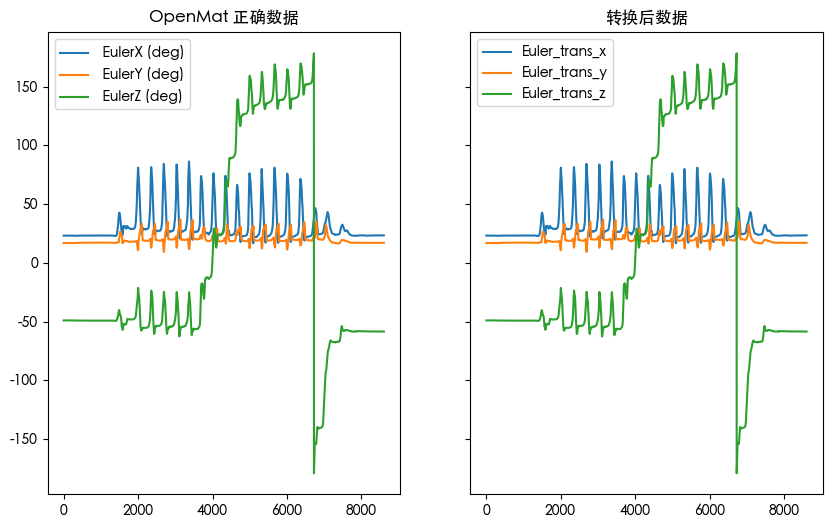

In [126]:
fig, axs = plt.subplots(1,2,figsize=(10,6),sharey = True)

plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

data[eulers_cols].plot(ax=axs[0])
axs[0].set_title("OpenMat 正确数据")


data[euler_trans_cols].plot(ax=axs[1])
axs[1].set_title("转换后数据")



In [127]:
data.to_csv("Test.csv",index=False)

<Axes: >

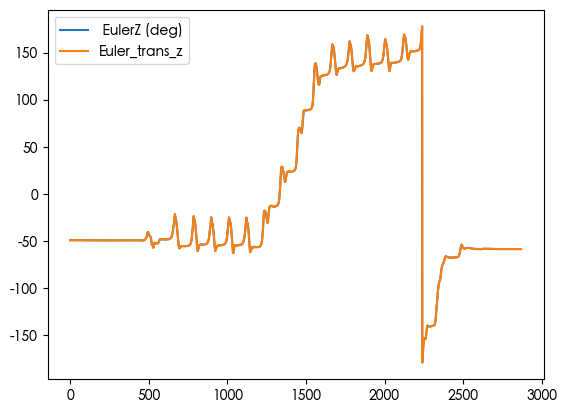

In [128]:
new_df = pd.read_csv("Test.csv")
new_df[[' EulerZ (deg)',"Euler_trans_z"]].plot()

In [121]:
new_df[[' EulerZ (deg)',"Euler_trans_z"]].iloc[1500:1510]

,EulerZ (deg),Euler_trans_z
1500,89.248535,89.248506
1501,89.235130,89.235100
1502,89.225983,89.225953
1503,89.220451,89.220423
1504,89.222969,89.222942
1505,89.233635,89.233600
1506,89.249329,89.249294
1507,89.198708,89.198676
1508,89.224426,89.224395
1509,89.255569,89.255542
